# 3.3 Datenvisualisierung Python
## Scatterplot, Barplot, Lineplot
### 26.04.2023


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Heutiger Datensatz
df = sns.load_dataset("taxis")
df

pickup             dropoff  passengers  distance  fare   
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  \
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone   
0     2.15    0.0  12.95  yellow  credit card        Lenox Hill West  \
1     0.00    0.0   9.30  yellow         cash  Upper West Side South   
2     2.36    0.0  14.16  yellow  credit card          Alphabet City   
3     6.15    0.0  36.95  yellow  credit card              Hudson Sq   
4     1.10    0.0  13.40  yellow  credit card           Midtown East   
...    ...    ...    ...     ...          ...                    ...   
6428  1.06    0.0   6.36   green  credit card      East Harlem North   
6429  0.00    0.0  58.80   green  credit card                Jamaica   
6430  0.00    0.0  17.30   green         cash    Crown Heights North   
6431  0.00    0.0   6.80   green  credit card          East New York   
6432  3.36    0.0  20.16   green  credit card            Boerum Hill   

                          dropoff_zone pickup_borough dropoff_borough  
0                  UN/Turtle Bay South      Manhattan       Manhattan  
1                Upper West Side South      Manhattan       Manhattan  
2                         West Village      Manhattan       Manhattan  
3                       Yorkville West      Manhattan       Manhattan  
4                       Yorkville West      Manhattan       Manhattan  
...                                ...            ...             ...  
6428              Central Harlem North      Manhattan       Manhattan  
6429  East Concourse/Concourse Village         Queens           Bronx  
6430                    Bushwick North       Brooklyn        Brooklyn  
6431      East Flatbush/Remsen Village       Brooklyn        Brooklyn  
6432                   Windsor Terrace       Brooklyn        Brooklyn  

[6433 rows x 14 columns]

## Scatterplot

<Axes: xlabel='distance', ylabel='total'>

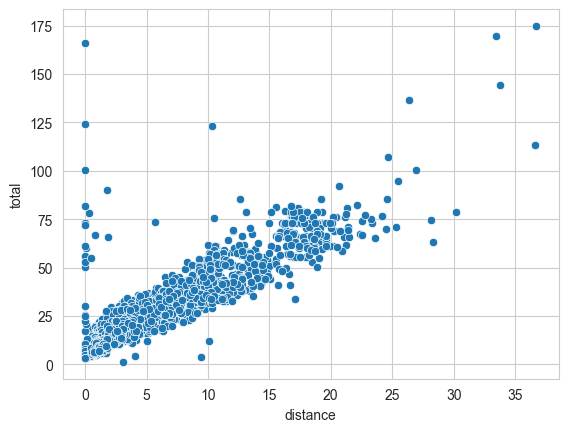

In [3]:
#Einfacher Scatterplot
sns.scatterplot(data=df, x="distance", y="total")

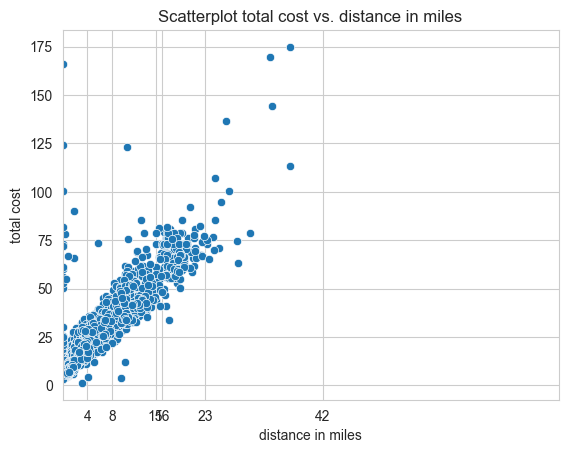

In [4]:
#Einfacher Scatterplot mit Label, Titel, Ticks...
ax = sns.scatterplot(data=df, x="distance", y="total")
ax.set(xlabel="distance in miles", ylabel="total cost")
ax.set(title="Scatterplot total cost vs. distance in miles")
ax.set_xticks([4,8,15,16,23,42])
ax.set_xlim([0,80])
plt.show()

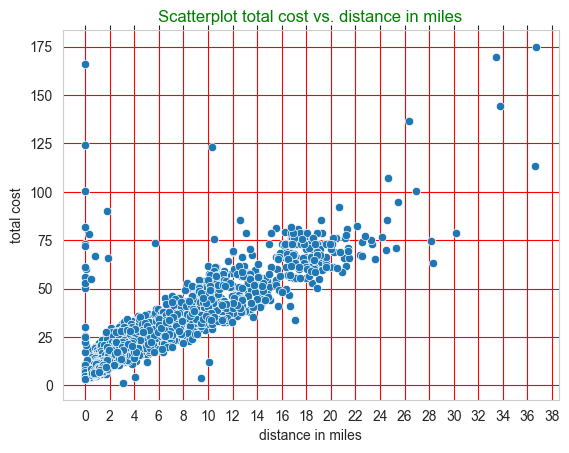

In [5]:
#Einfacher Scatterplot mit farbigem Gitter und farbiger Überschrift
with sns.axes_style(style="whitegrid", rc={"grid.color": "red", "text.color": "green", "xtick.top":True}):
    ax = sns.scatterplot(data=df, x="distance", y="total")
ax.set(xlabel="distance in miles", ylabel="total cost")
ax.set(title="Scatterplot total cost vs. distance in miles")
ax.set_xticks(range(0,40,2))
plt.show()

<Axes: xlabel='distance', ylabel='total'>

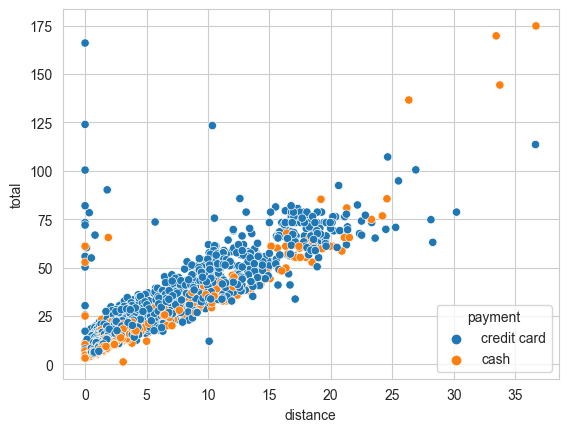

In [6]:
#Gruppierter Scatterplot
sns.scatterplot(data=df, x="distance", y="total", hue="payment")

<Axes: xlabel='distance', ylabel='total'>

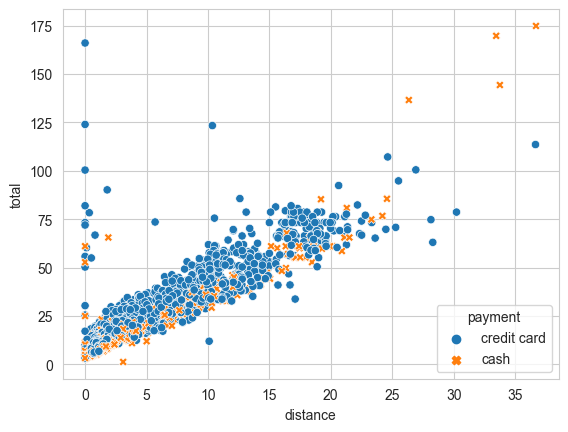

In [7]:
#Gruppierter Scatterplot mit Style
sns.scatterplot(data=df, x="distance", y="total", hue="payment", style="payment")

<Axes: xlabel='distance', ylabel='total'>

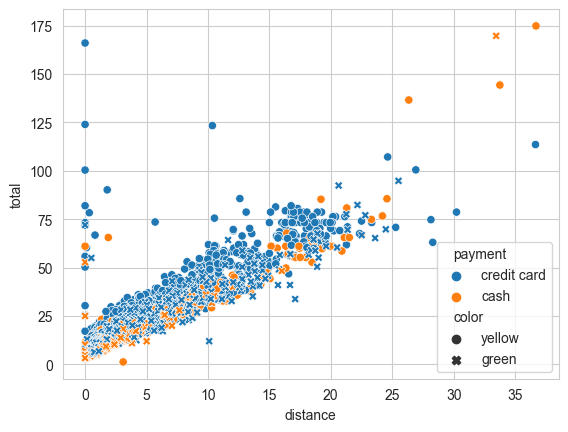

In [8]:
#Style und Hue mit kategorischen Infos
sns.scatterplot(data=df, x="distance", y="total", hue="payment", style="color")

tip
0.00    2311
1.00     312
2.00     211
2.16      89
1.86      79
        ... 
7.94       1
7.95       1
0.89       1
9.36       1
7.70       1
Name: count, Length: 489, dtype: int64


<Axes: xlabel='distance', ylabel='total'>

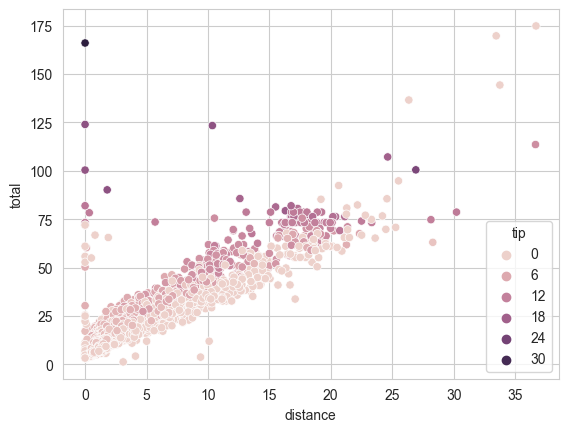

In [9]:
#Numeric Hue
print(df["tip"].value_counts())
sns.scatterplot(data=df, x="distance", y="total", hue="tip")

tip
0.00    2311
1.00     312
2.00     211
2.16      89
1.86      79
        ... 
7.94       1
7.95       1
0.89       1
9.36       1
7.70       1
Name: count, Length: 489, dtype: int64


<Axes: xlabel='distance', ylabel='total'>

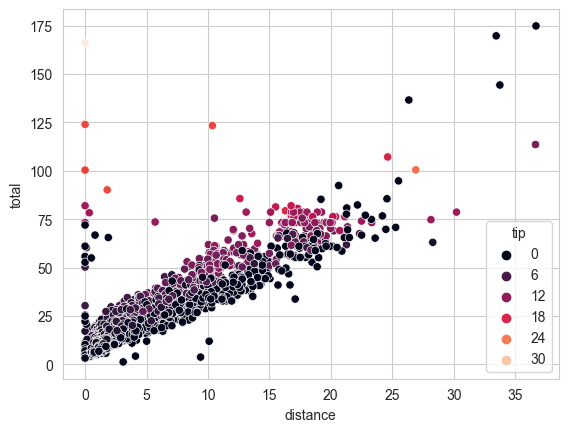

In [10]:
#Hue Farbe ändern
#Farbpaletten: https://seaborn.pydata.org/tutorial/color_palettes.html
print(df["tip"].value_counts())
sns.scatterplot(data=df, x="distance", y="total", hue="tip", palette="rocket")

<Axes: xlabel='distance', ylabel='total'>

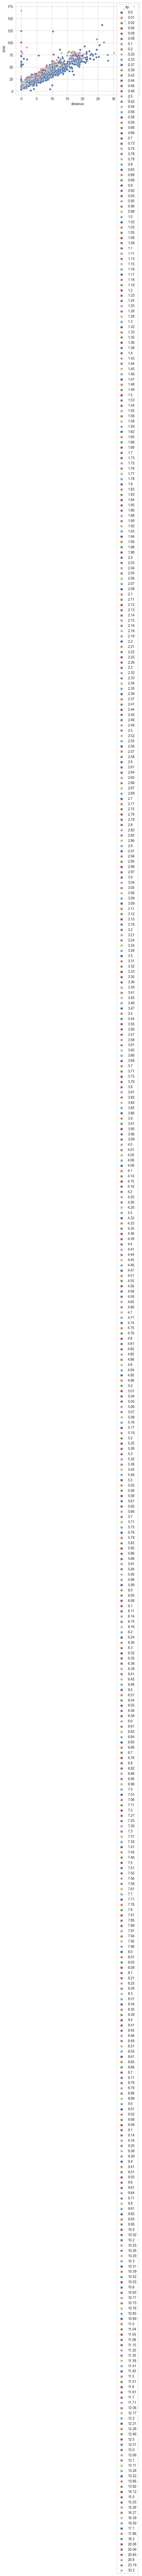

In [11]:
#Kategorische Farbpalette für sequentielle Daten
sns.scatterplot(data=df, x="distance", y="total", hue="tip", palette="deep")

<Axes: xlabel='distance', ylabel='total'>

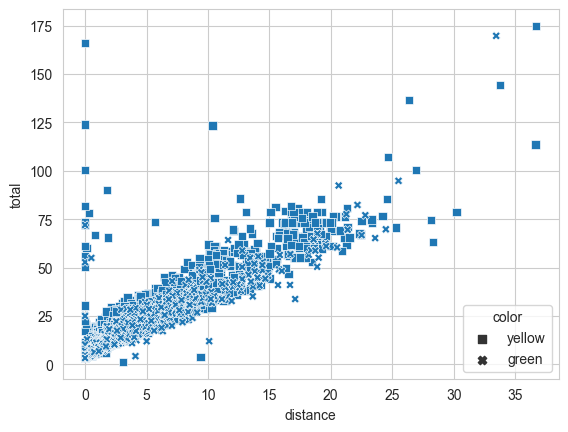

In [12]:
#Marker selbst kontrollieren
#Liste an Markern: https://matplotlib.org/stable/api/markers_api.html
markers = {"yellow": "s", "green": "X"}
sns.scatterplot(data=df, x="distance", y="total", style="color", markers=markers)

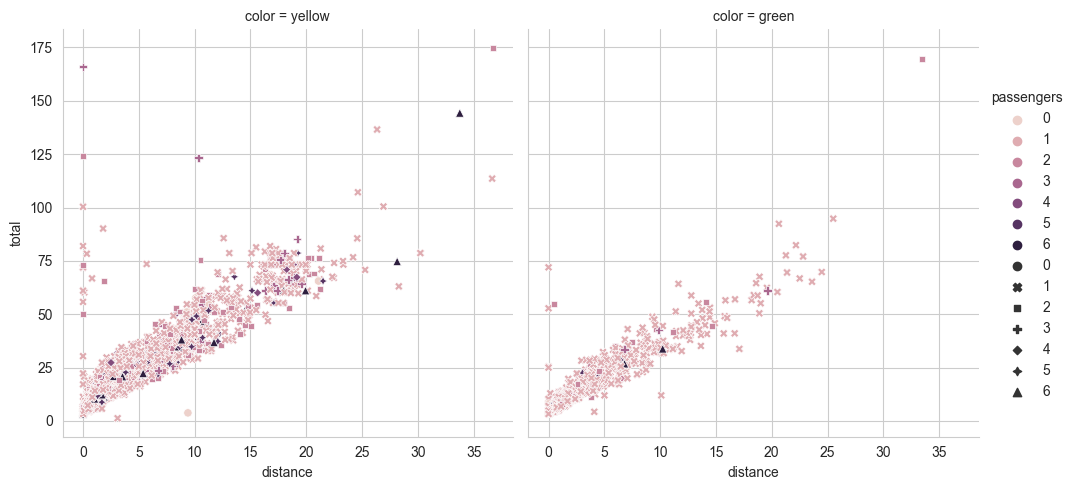

In [13]:
#FacetGrid / auftrennen in mehrere Plots
sns.relplot(
    data=df, x="distance", y="total",
    col="color", hue="passengers", style="passengers",
    kind="scatter"
)

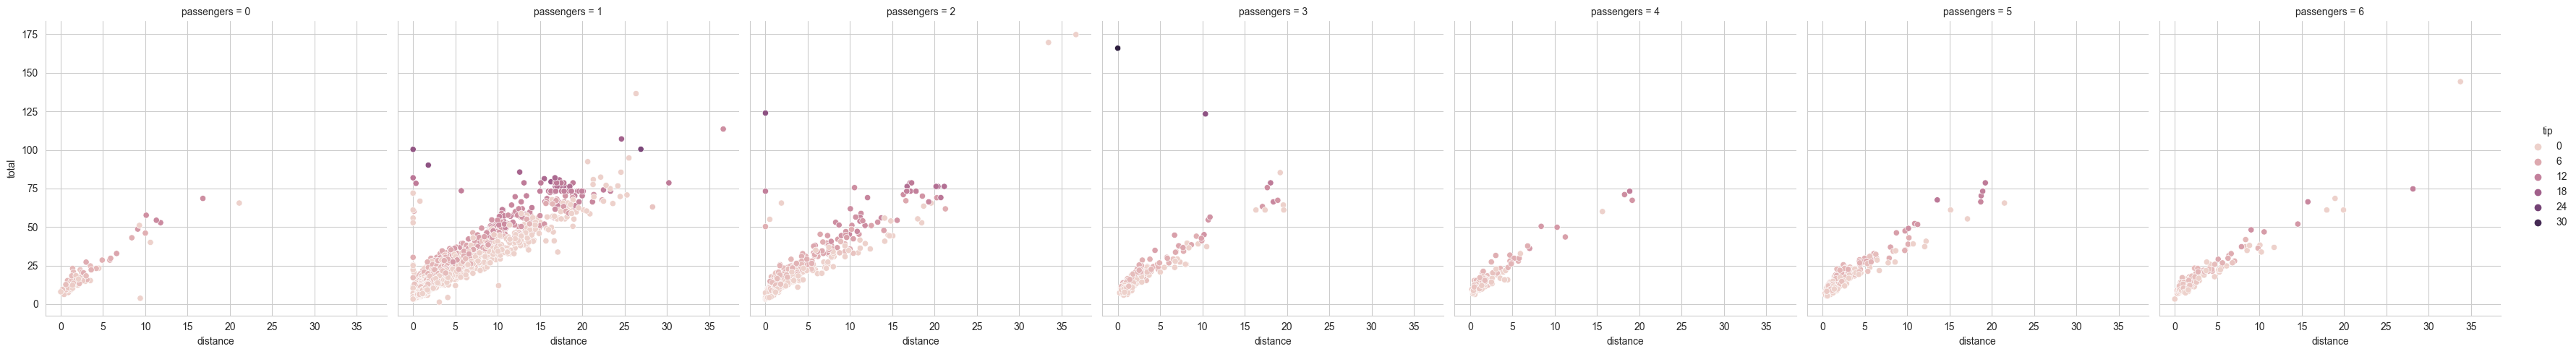

In [14]:
#Auch mit mehr als zwei Plots möglich
sns.relplot(
    data=df, x="distance", y="total",
    col="passengers", hue="tip",
    kind="scatter"
)

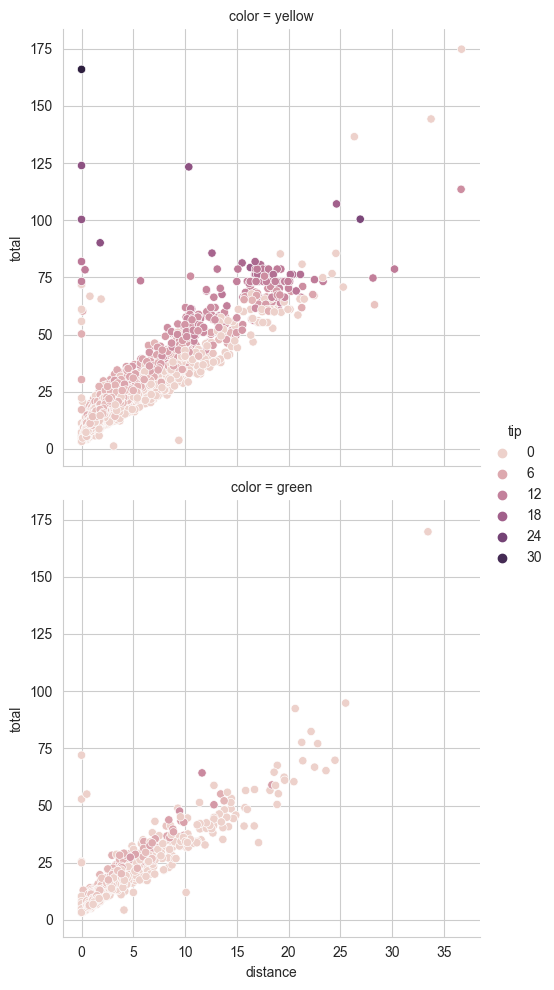

In [15]:
#Darstellung in Zeilen statt Spalten
sns.relplot(
    data=df, x="distance", y="total",
    row="color", hue="tip",
    kind="scatter"
)

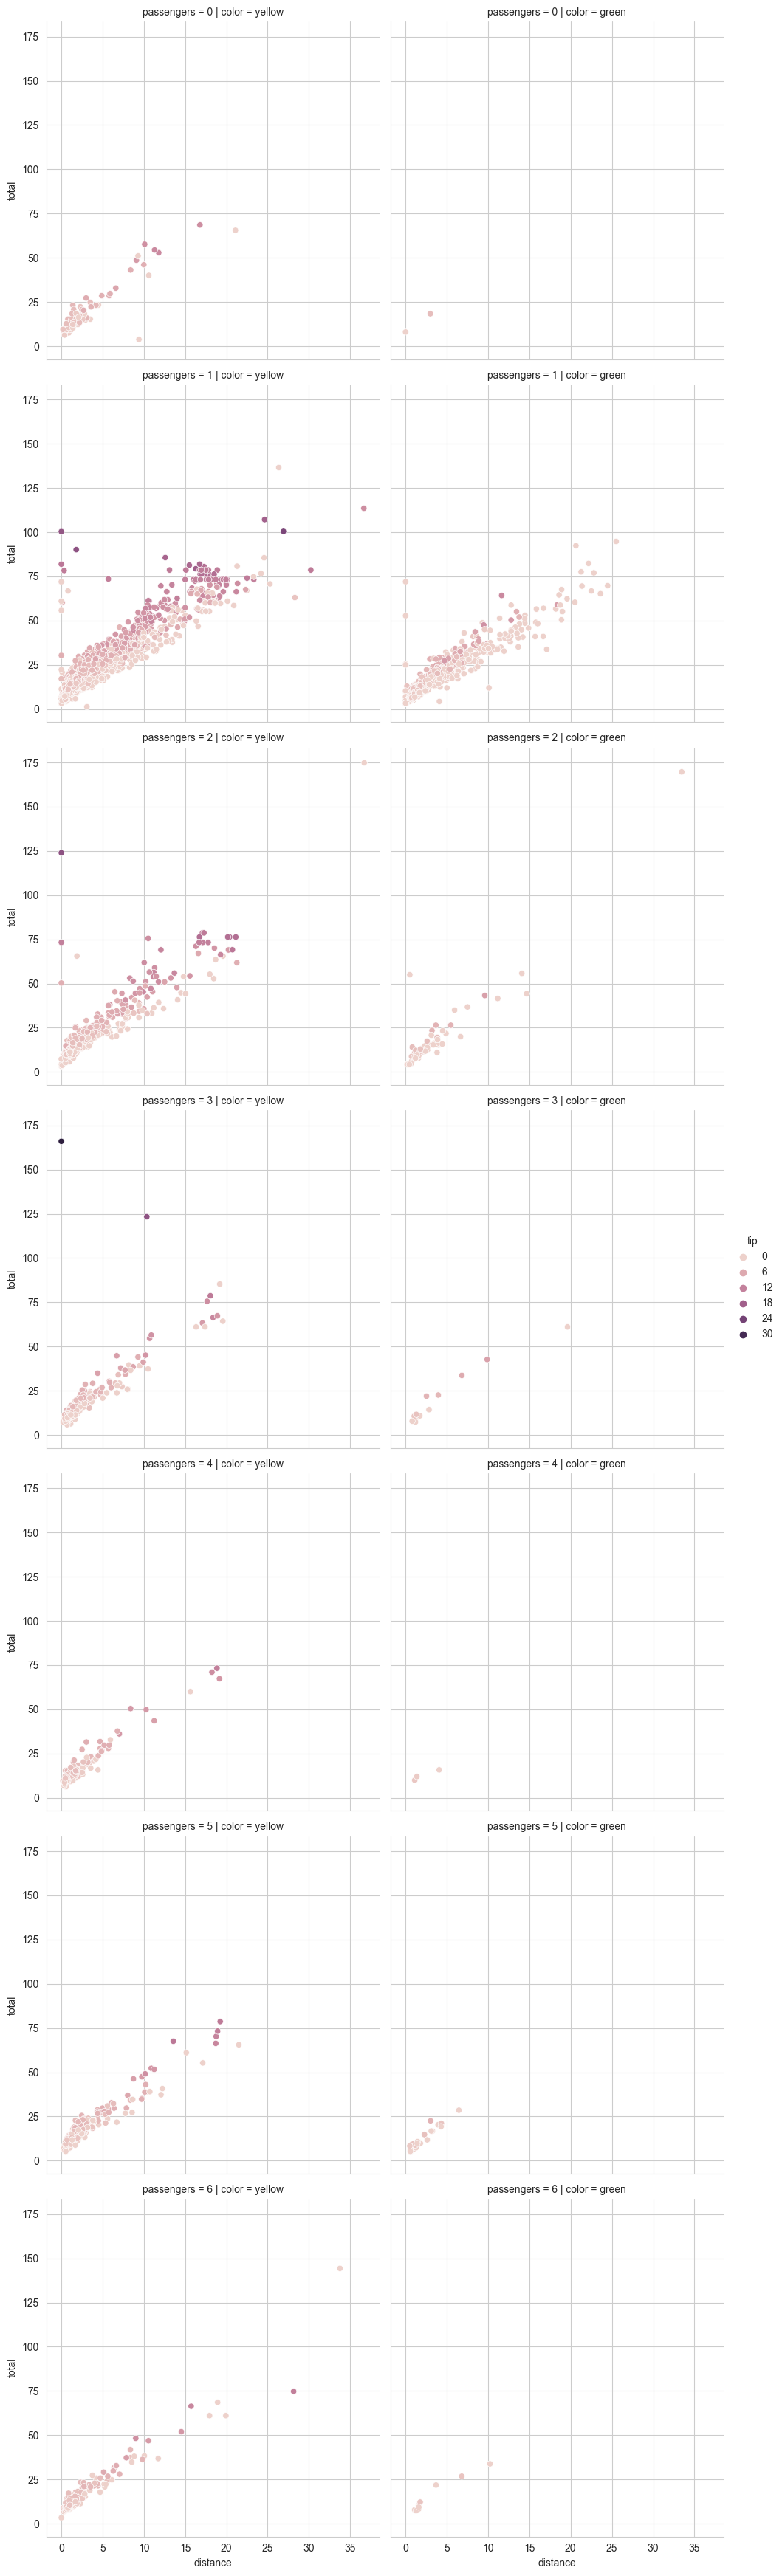

In [16]:
#Darstellung in Zeilen UND Spalten
sns.relplot(
    data=df, x="distance", y="total",
    row="passengers", col="color", hue="tip",
    kind="scatter"
)

## Übungsaufgabe Scatterplot

In [ ]:
#Lade den penguins Datensatz und erstelle den im Unterricht gezeigten Scatterplot


## Barplot

<Axes: xlabel='pickup_borough', ylabel='total'>

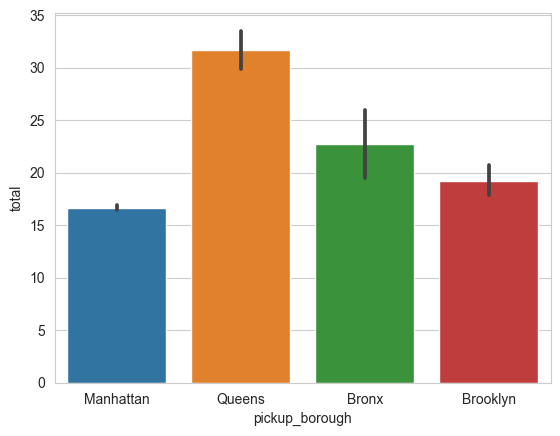

In [19]:
#Einfacher Barplot mit Konfidenzintervallen
sns.barplot(data=df, x="pickup_borough", y="total")

<Axes: xlabel='pickup_borough', ylabel='total'>

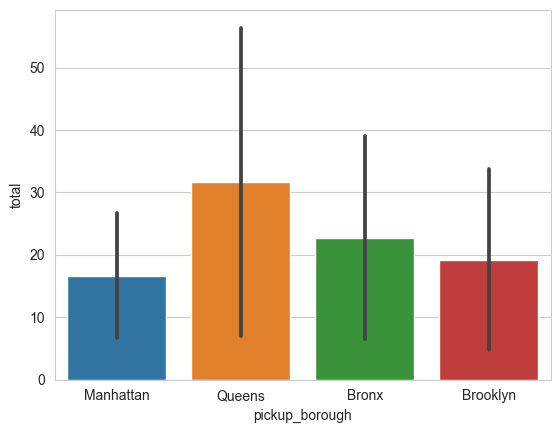

In [20]:
#Einfacher Barplot mit anderen Fehlerbalken
sns.barplot(data=df, x="pickup_borough", y="total", errorbar="sd")

<Axes: xlabel='pickup_borough', ylabel='total'>

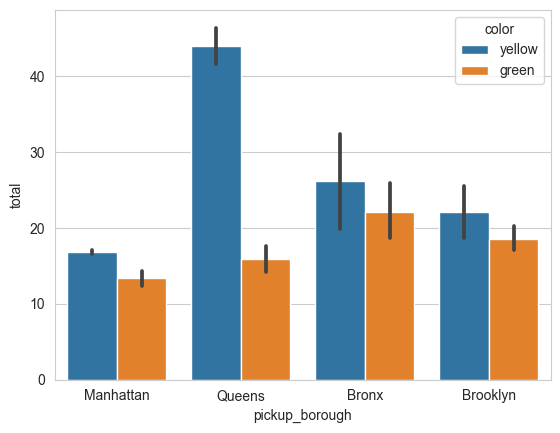

In [21]:
#Gruppierter Barplot
sns.barplot(data=df, x="pickup_borough", y="total", hue="color")

<Axes: xlabel='pickup_borough', ylabel='total'>

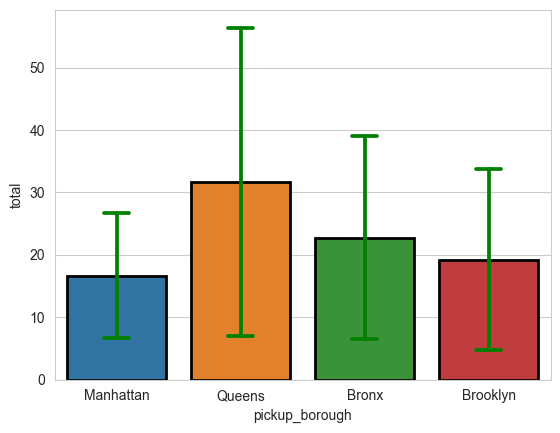

In [50]:
#Funktionsschau
sns.barplot(
    data=df, x="pickup_borough", y="total",
    errorbar="sd", capsize=.2, errcolor="green",
    linewidth=2, edgecolor="black"
)

## Übungsaufgabe Barplot

In [ ]:
#Lade den penguins Datensatz und erstelle den im Unterricht gezeigten Barplot


Für weitere Infos und Anpassungen: 
https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

## Lineplot

In [110]:
df = sns.load_dataset("flights")
df

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

<Axes: xlabel='year', ylabel='passengers'>

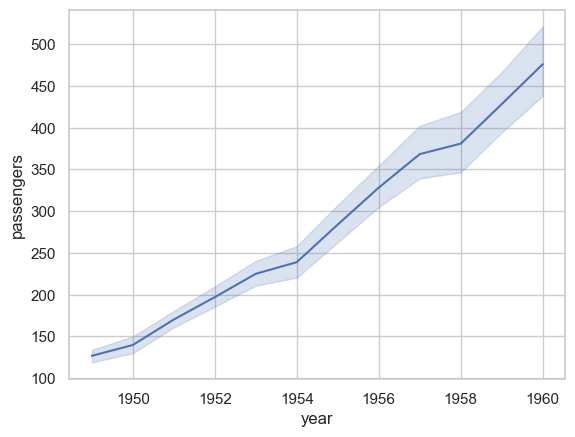

In [114]:
#Einfacher Lineplot
sns.lineplot(data=df, x="year", y="passengers")

<Axes: xlabel='year', ylabel='passengers'>

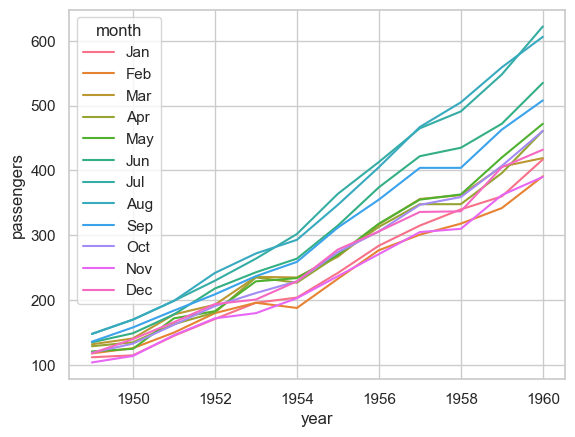

In [102]:
#Gruppierter Lineplot
sns.lineplot(data=df, x="year", y="passengers", hue="month")

<Axes: xlabel='year', ylabel='passengers'>

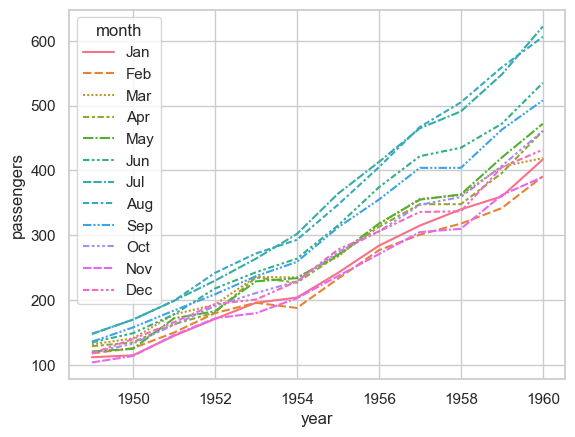

In [103]:
#Gruppierter Lineplot mit Style
sns.lineplot(data=df, x="year", y="passengers", hue="month", style="month")

In [115]:
df = sns.load_dataset("tips")
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

<Axes: xlabel='day', ylabel='tip'>

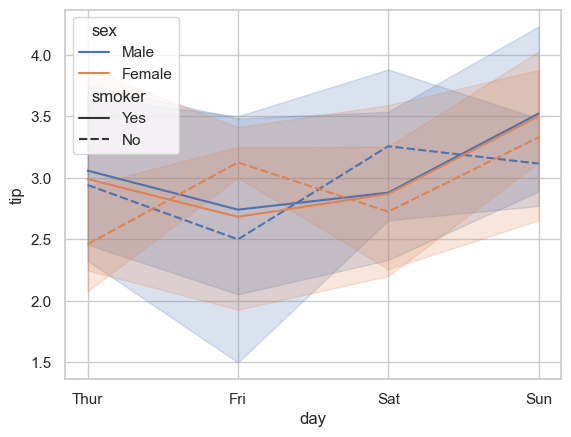

In [116]:
#Mit Hue und Style getrennt wieder mehrere Variablen trennen
sns.lineplot(data=df, x="day", y="tip", hue="sex", style="smoker")

<Axes: xlabel='day', ylabel='tip'>

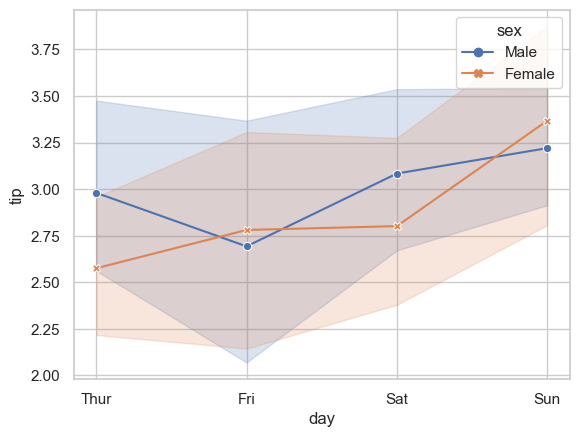

In [122]:
#Marker einsetzen
sns.lineplot(
    data=df,
    x="day", y="tip", hue="sex", style="sex",
    markers=True, dashes=False
)

<Axes: xlabel='day', ylabel='tip'>

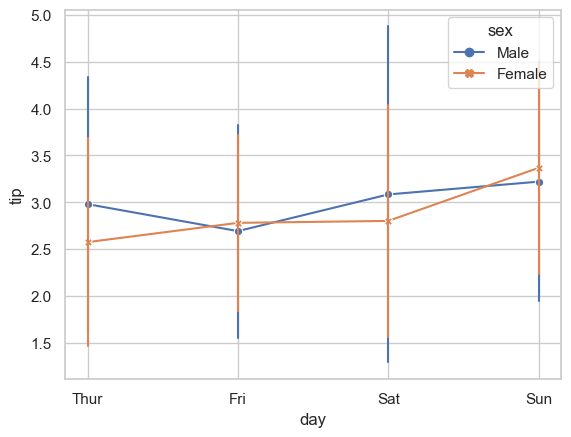

In [124]:
#Errorbars als Marker (jetzt wird kombiniert)
sns.lineplot(
    data=df,
    x="day", y="tip", hue="sex", style="sex", err_style="bars", errorbar="sd",
    markers=True, dashes=False
)

## Übungsaufgabe Lineplot

In [ ]:
#Lade den planets Datensatz und erstelle den im Unterricht gezeigten Lineplot
